In [1]:
import datetime
import mysql.connector
import operator
import numpy as np
from scipy import special

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

import plotly as py
import plotly.graph_objs as go

import ipywidgets as widgets

import pandas as pd
import datetime
import seaborn as sb

In [2]:
sb.set()

In [3]:
py.offline.init_notebook_mode(connected = True)

### Time Series Plot of Vulcamycin (Metabolite_id = 1943)

In [4]:
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query('''select bioanalysis_metabolite_price.date, bioanalysis_metabolite_price.price, bioanalysis_metabolite_price.amount, bioanalysis_metabolite_price.unity, provider.name as provider_name
                                 from bioanalysis_metabolite_price
                                 JOIN provider 
                                 on provider.id = bioanalysis_metabolite_price.provider_id
                                 where metabolite_id = 1943; ''', cnx, index_col = 'date', parse_dates=True)


df = pd.DataFrame(sql_query, columns=['price', 'amount', 'unity', 'provider_name'])
print(df)


                       price  amount unity          provider_name
date                                                             
2017-12-22 20:34:05   119.31    50.0    mg  Selleck Chemicals LLC
2017-12-22 20:34:05    46.25     1.0     g          Cayman Europe
2017-12-22 20:34:05   160.00     5.0     g          Cayman Europe
2017-12-22 20:34:05   272.50    10.0     g          Cayman Europe
2017-12-22 20:34:05   152.00     3.0  µmol    InterBioScreen Ltd.
...                      ...     ...   ...                    ...
2019-07-14 12:23:53   792.00    20.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53   892.00    25.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53   991.00    30.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53  1182.00    50.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53  1563.00   100.0    mg    InterBioScreen Doo.

[454 rows x 4 columns]


In [5]:
df.unity.unique()

array(['mg', 'g', 'µmol'], dtype=object)

In [6]:
# Converter x gramas em 1g !!
df.price = np.where(df.unity == 'g', df.price/df.amount, df.price)  # where True, yield x, otherwise yield y
df.amount = np.where(df.unity == 'g', 1, df.amount)
print(df)

                       price  amount unity          provider_name
date                                                             
2017-12-22 20:34:05   119.31    50.0    mg  Selleck Chemicals LLC
2017-12-22 20:34:05    46.25     1.0     g          Cayman Europe
2017-12-22 20:34:05    32.00     1.0     g          Cayman Europe
2017-12-22 20:34:05    27.25     1.0     g          Cayman Europe
2017-12-22 20:34:05   152.00     3.0  µmol    InterBioScreen Ltd.
...                      ...     ...   ...                    ...
2019-07-14 12:23:53   792.00    20.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53   892.00    25.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53   991.00    30.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53  1182.00    50.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53  1563.00   100.0    mg    InterBioScreen Doo.

[454 rows x 4 columns]


In [7]:
# Converter x miligramas em 1mg !!
df.price = np.where(df.unity == 'mg', df.price/df.amount, df.price)  # where True, yield x, otherwise yield y
df.amount = np.where(df.unity == 'mg', 1, df.amount)
print(df)

                          price  amount unity          provider_name
date                                                                
2017-12-22 20:34:05    2.386200     1.0    mg  Selleck Chemicals LLC
2017-12-22 20:34:05   46.250000     1.0     g          Cayman Europe
2017-12-22 20:34:05   32.000000     1.0     g          Cayman Europe
2017-12-22 20:34:05   27.250000     1.0     g          Cayman Europe
2017-12-22 20:34:05  152.000000     3.0  µmol    InterBioScreen Ltd.
...                         ...     ...   ...                    ...
2019-07-14 12:23:53   39.600000     1.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53   35.680000     1.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53   33.033333     1.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53   23.640000     1.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53   15.630000     1.0    mg    InterBioScreen Doo.

[454 rows x 4 columns]


In [8]:
# Converter x µmol em 1µmol !!
df.price = np.where(df.unity == 'µmol', df.price/df.amount, df.price)  # where True, yield x, otherwise yield y
df.amount = np.where(df.unity == 'µmol', 1, df.amount)
print(df)

                         price  amount unity          provider_name
date                                                               
2017-12-22 20:34:05   2.386200     1.0    mg  Selleck Chemicals LLC
2017-12-22 20:34:05  46.250000     1.0     g          Cayman Europe
2017-12-22 20:34:05  32.000000     1.0     g          Cayman Europe
2017-12-22 20:34:05  27.250000     1.0     g          Cayman Europe
2017-12-22 20:34:05  50.666667     1.0  µmol    InterBioScreen Ltd.
...                        ...     ...   ...                    ...
2019-07-14 12:23:53  39.600000     1.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53  35.680000     1.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53  33.033333     1.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53  23.640000     1.0    mg    InterBioScreen Doo.
2019-07-14 12:23:53  15.630000     1.0    mg    InterBioScreen Doo.

[454 rows x 4 columns]


In [9]:
#See results grouped by provider_name
grouped_df = df.groupby(['unity','provider_name'])

for key, item in grouped_df:
    print('Unity, Provider:', key)
    print(grouped_df.get_group(key), "\n\n")

Unity, Provider: ('g', 'Cayman Europe')
                      price  amount unity  provider_name
date                                                    
2017-12-22 20:34:05  46.250     1.0     g  Cayman Europe
2017-12-22 20:34:05  32.000     1.0     g  Cayman Europe
2017-12-22 20:34:05  27.250     1.0     g  Cayman Europe
2018-02-08 20:27:15  47.730     1.0     g  Cayman Europe
2018-02-08 20:27:15  33.024     1.0     g  Cayman Europe
2018-02-08 20:27:15  28.122     1.0     g  Cayman Europe
2018-03-08 21:27:02  47.730     1.0     g  Cayman Europe
2018-03-08 21:27:02  33.024     1.0     g  Cayman Europe
2018-03-08 21:27:02  28.122     1.0     g  Cayman Europe
2018-04-08 23:19:57  47.730     1.0     g  Cayman Europe
2018-04-08 23:19:57  33.024     1.0     g  Cayman Europe
2018-04-08 23:19:57  28.122     1.0     g  Cayman Europe
2018-05-09 01:41:23  47.730     1.0     g  Cayman Europe
2018-05-09 01:41:23  33.024     1.0     g  Cayman Europe
2018-05-09 01:41:23  28.122     1.0     g  Cayma

c:\users\sofia\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



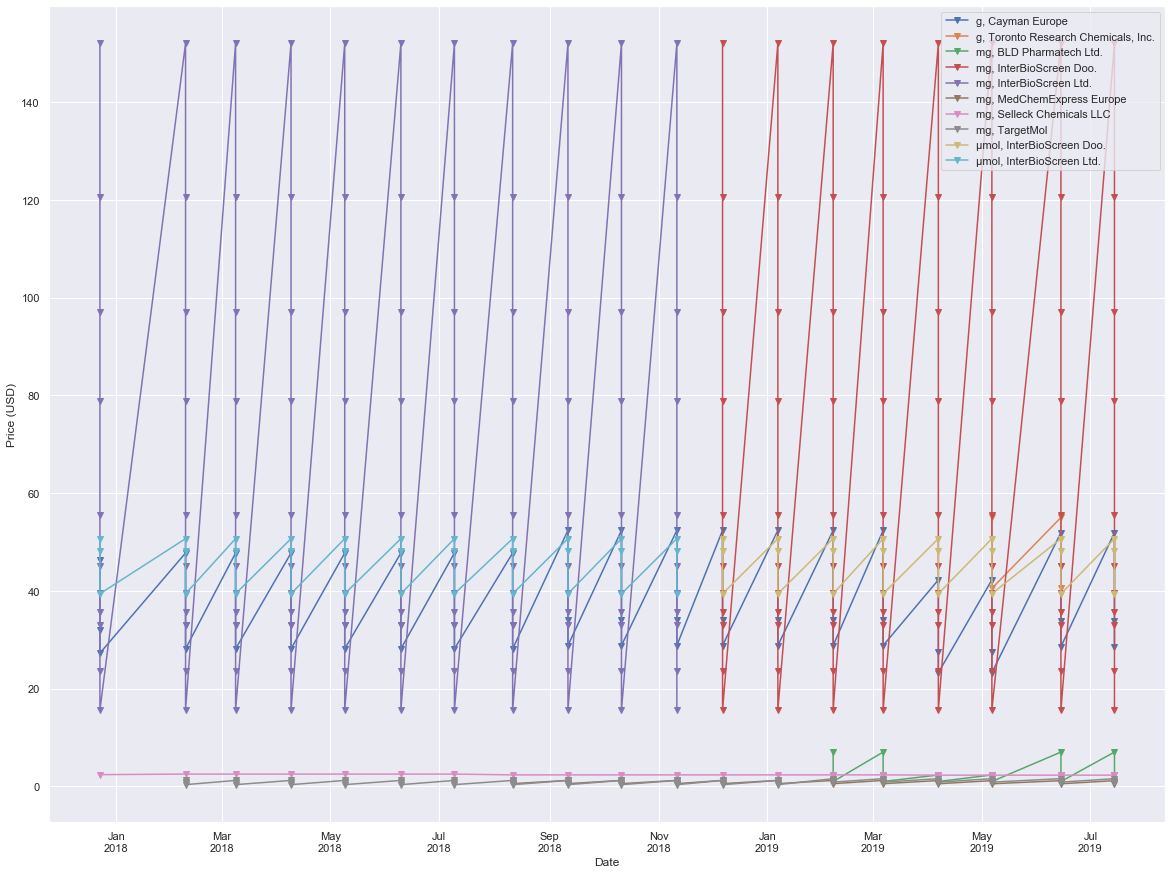

In [10]:
#Create plot!!
df = df.sort_index()

fig, ax = plt.subplots(figsize=(20, 15))
for k,g in df.groupby(['unity','provider_name'])['price']:
    ax.plot_date(pd.to_datetime(g.index),g,'v-',label="{}, {}".format(*k))

#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [11]:
unity_df = df.groupby(['unity'])['price']

for k, g in unity_df:
    print(k)

prov_df = df.groupby(['provider_name'])['price']

for k, g in prov_df:
    print(k)

g
mg
µmol
BLD Pharmatech Ltd.
Cayman Europe
InterBioScreen Doo.
InterBioScreen Ltd.
MedChemExpress Europe
Selleck Chemicals LLC
TargetMol
Toronto Research Chemicals, Inc.


In [12]:
#Create plot with plotly

df = df.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of Vulcamycin',
    yaxis = dict(
        title = 'price(USD)'
    ),
    xaxis = dict(
        title = 'date'
    )
)


opt_list = []
for key, item in grouped_df:
#     print('key:', key)
    opt_list.append(str(key[0] + ' ' + key[1]))

# print('opt_list:', opt_list)
    

d_x = {}
d_y = {}
for k,g in df.groupby(['unity','provider_name'])['price']:
    x = pd.to_datetime(g.index)
    y = g.values
    k = str(k[0] + ' ' + k[1])
#     print('k: ', k)
    if k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
#         print(d_x)
#         print(d_y)
    elif k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    else: print('There is a unity,provider lacking on the x or y dict.')
    
    
def update_plot(unity):#, freq):
   data = []
   for s in unity:
       trace1 = go.Scatter(
           x = d_x[s],
           y = d_y[s],
           mode = 'lines',
           name = 'unity, provider {}'.format(s),
           line = dict(
               shape = 'spline' #smooth line
           )
       )
       data.append(trace1)
    
   fig = go.Figure(data = data, layout= layout)
   py.offline.iplot(fig)

    
unity = widgets.SelectMultiple(options = opt_list, description = 'Unity, Prov') #value = key_list,
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, unity = unity )#, freq = freq)

interactive(children=(SelectMultiple(description='Unity, Prov', options=('g Cayman Europe', 'g Toronto Researc…

Não está a funcionar colocar tudo no mesmo gráfico. Se calhar vou tentar de outra maneira. Ou tentar descobrir como consigo colocar as keys iguais às options de MultipleSelect.